In [1]:
!pip install prince

# Dimensionality Reduction: MCA & FAMD Assignment

In [11]:
import prince
import pandas as pd

### Import the HR data set 

In [12]:
data_url = 'https://raw.githubusercontent.com/Thinkful-Ed/data-science-lectures/master/hr_dataset.csv'

### Identify which columns in the data are numeric and which are categorical.

Correct any columns that have been misassigned a numeric data type when they should be categorical.

In [14]:
data = pd.read_csv(data_url)
data.dtypes

Age                    int64
Pay Rate             float64
State                 object
Zip                    int64
Sex                   object
MaritalDesc           object
CitizenDesc           object
Hispanic/Latino       object
RaceDesc              object
Days Employed          int64
Reason For Term       object
Employment Status     object
Department            object
Position              object
Manager Name          object
Employee Source       object
Performance Score     object
dtype: object

### Pull out the categorical variables and note the dimensions of the data set.

In [15]:
new_data = data.select_dtypes(include="O")

### Reduce these categorical features down to two dimensions using MCA.

In [18]:
mca = prince.MCA()
mca.fit(new_data)
coordinates = mca.transform(new_data)
coordinates

,0,1
0,0.196431,0.077754
1,0.448757,0.054167
2,0.265289,0.055728
3,0.157444,0.043518
4,0.332064,0.040128
...,...,...
305,0.098051,1.770463
306,0.098051,1.770463
307,0.124461,1.729758
308,0.092920,1.725911


### Plot the coordinates of each resulting dimension.

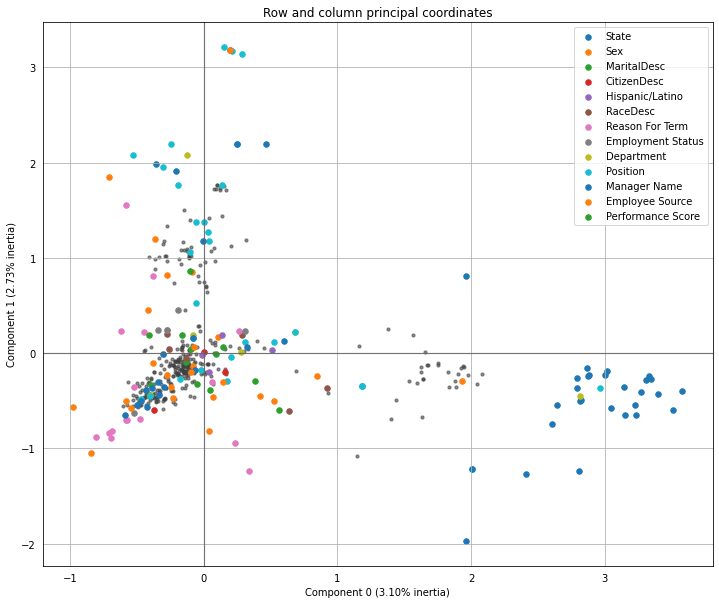

In [20]:
mca.plot_coordinates(new_data,figsize=(12,10))

### One hot encode the categorical features and note the change in dimensions in the data set.

In [22]:
data_one_hot = pd.get_dummies(new_data)

### Reduce the one hot encoded categorical features down to two dimensions using CA.

In [23]:
ca = prince.CA()
ca.fit(data_one_hot)
coordinates = ca.transform(data_one_hot)
coordinates

,0,1
0,0.196248,0.076231
1,0.448504,0.053280
2,0.265278,0.053555
3,0.157460,0.042270
4,0.332193,0.038408
...,...,...
305,0.098114,1.770987
306,0.098114,1.770987
307,0.124533,1.730322
308,0.092976,1.726863


### Plot the coordinates of each resulting dimension.

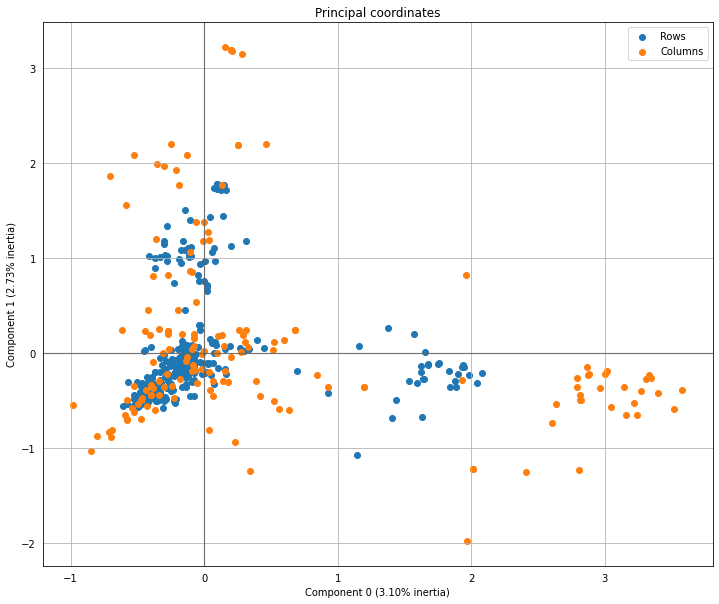

In [24]:
ca.plot_coordinates(
    data_one_hot, show_col_labels=False, show_row_labels=False, figsize=(12, 10)
)

### Use FAMD to reduce the entire data set (both the categorical and numeric features) down to two dimensions.

In [25]:
famd = prince.FAMD()
famd.fit(data)
coordinates = famd.transform(data)
coordinates

,0,1
0,0.295127,1.795501
1,-0.107001,0.385344
2,-0.105121,0.032404
3,-0.713583,-1.062606
4,-0.535943,-0.241342
...,...,...
305,0.499717,-1.930690
306,0.462245,-2.079674
307,0.310834,-2.012347
308,0.251481,-2.131739


### Plot the coordinates of each resulting dimension, color-coding the plot points according to Employment Status.

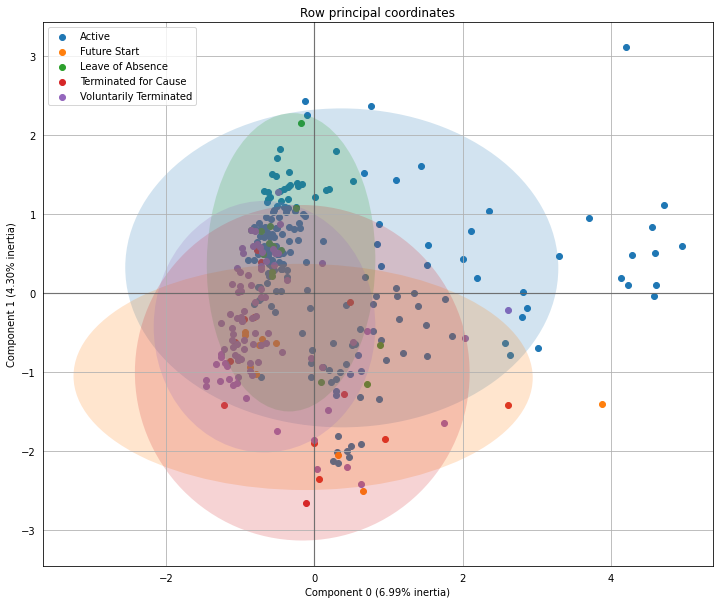

In [26]:
famd.plot_row_coordinates(
    data, figsize=(12, 10), color_labels=data["Employment Status"]
)